In [51]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)
source('cleanup.R')


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [16]:
Player <- read_csv("players.csv")
Player

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,NA,NA
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,NA,NA
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,NA,NA


Activity 1: Explore Datasets - Preliminary
Answer 3 questions: What is the dataset about? How many variables are there? How many observations are there?

1. This dataset is about how people play video games. A computer science research group at UBC set up a link to a website external to the Minecraft server. Players' movements are recorded as they traverse the world. This dataset includes players' name, gender, age, email address, and familiarity with Minecraft and their total time spent playing the game. This dataset has a total of 9 variables and 196 sets of observations.


Activity 2: Explore Datasets Part 2 - Outcome Variable
 Answer 3 questions : 
       Identify the main outcome/categorical/label variable in the dataset.
       How many values/groups are in this variable?
       How many observations are there in each value/group?


2.This dataset includes players' name, gender, age, email address, and familiarity with Minecraft and their total time spent playing the game. In this data set, there are a total of 9 different categories, but only 7 major categories, and 2 categories have no specific data. Each variable contains 196 values. This means that there are 196 observations for each variable, for a total of 1764 observations.


By the way, we can see that this dataset is not currently the cleanest. So I first got rid of the three variables that had no numerical value. Adjusted two variables, experience and played_hours, split experience into pro, veteran, amateur, regular, beginner, 5 different invariants. And factoring play time into each variable separately. As a result, the final diagram is the cleanest.

In [48]:
cleaned_Player <- Player |>
  select(-hashedEmail, -individualId, -organizationName) 
cleaned_Player

experience,subscribe,played_hours,name,gender,age
<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,30.3,Morgan,Male,9
Veteran,TRUE,3.8,Christian,Male,17
Veteran,FALSE,0.0,Blake,Male,17
Amateur,TRUE,0.7,Flora,Female,21
Regular,TRUE,0.1,Kylie,Male,21
Amateur,TRUE,0.0,Adrian,Female,17
Regular,TRUE,0.0,Luna,Female,19
Amateur,FALSE,0.0,Emerson,Male,21
Amateur,TRUE,0.1,Natalie,Male,17


In [60]:
player_wide <- pivot_wider(cleaned_Player,
  names_from = experience,
  values_from = played_hours) 

player_wide

subscribe,name,gender,age,Pro,Veteran,Amateur,Regular,Beginner
<lgl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TRUE,Morgan,Male,9,30.3,NA,NA,NA,NA
TRUE,Christian,Male,17,NA,3.8,NA,NA,NA
FALSE,Blake,Male,17,NA,0.0,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
FALSE,Dylan,Prefer not to say,17,NA,NA,0.0,NA,NA
FALSE,Harlow,Male,17,NA,NA,2.3,NA,NA
TRUE,Ahmed,Other,91,0.2,NA,NA,NA,NA


Activity 3: Explore Datasets Part 3 - Visualisations!

3. The question I chose was question 1: "We want to know which" types "of players are most likely to contribute large amounts of data so that we can target those players in our recruitment efforts." 
Personally, I think that the players who played the game for a long time and had more experience, the Veteran players contributed more data. So I'm going to chart these two variables, experience and played_hours, and figure out which players deserve special attention.

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 50
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

Warning message:
“Removed 148 rows containing missing values or values outside the scale range
(`geom_line()`).”


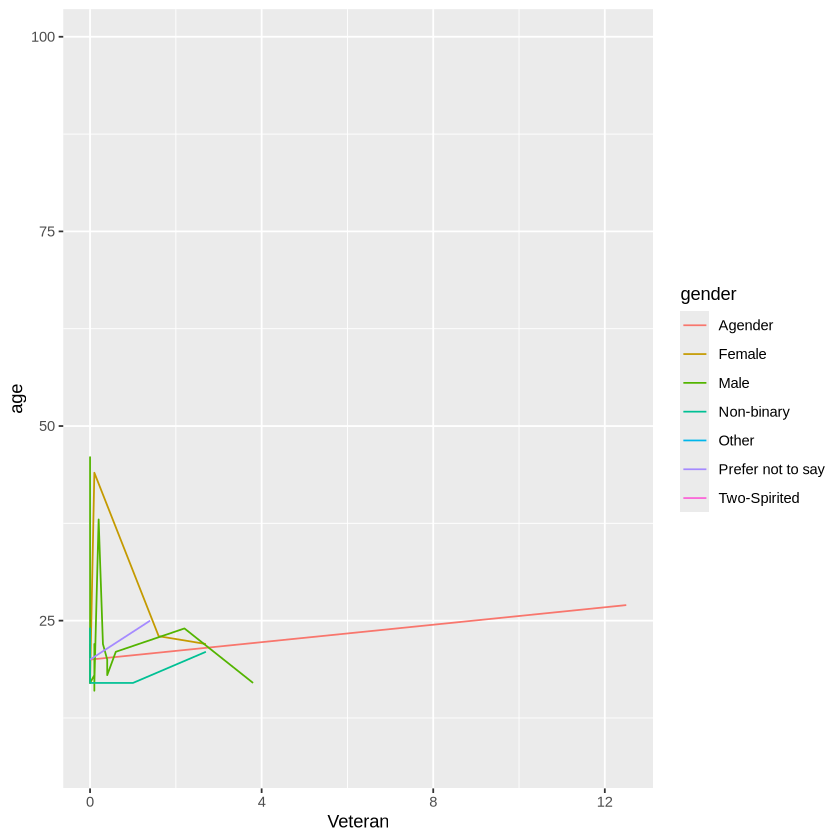

In [73]:
player_line <- ggplot(player_wide, aes(x = Veteran, y = age, color = gender)) +
  geom_line() +
  xlab("played hours(hr)") +
  ylab("Experience") +
  labs(x = "Veteran", y = "age", color = "gender")
  theme(text = element_text(size = 50))

player_line
 

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 50
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

Warning message:
“Removed 148 rows containing missing values or values outside the scale range
(`geom_point()`).”


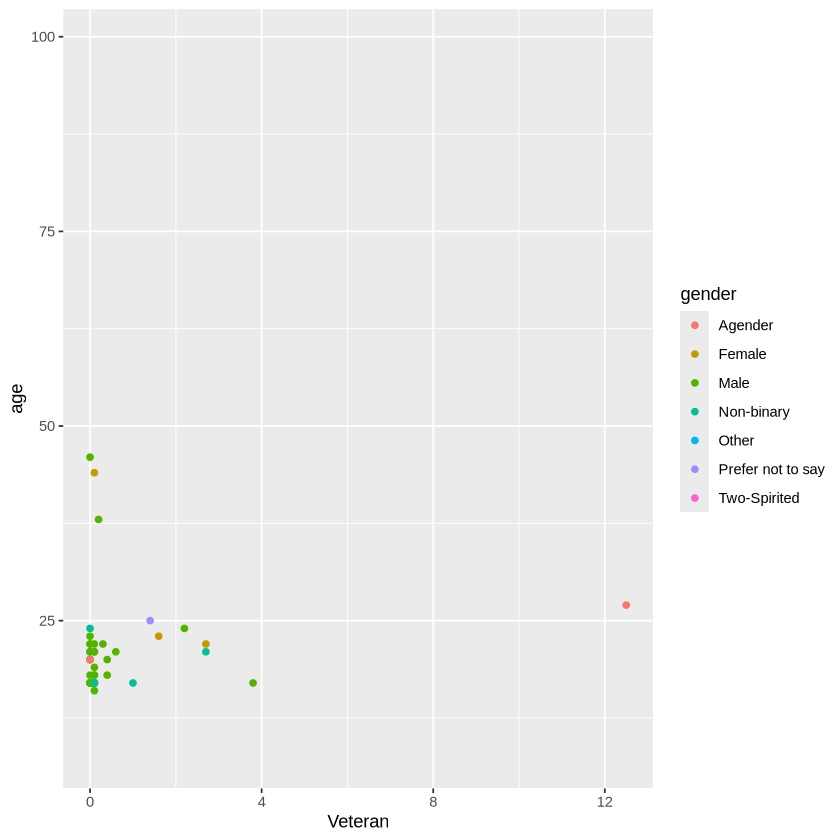

In [72]:
player_point <- ggplot(player_wide, aes(x = Veteran, y = age, color = gender)) +
  geom_point() +
  xlab("played hours(hr)") +
  ylab("Experience") +
  labs(x = "Veteran", y = "age", color = "gender")
  theme(text = element_text(size = 50))

player_point
 

In [74]:
player_split <- initial_split(player_wide, prop = 0.75, strata = Veteran)
player_training <- training(player_split)
player_testing <- testing(player_split)

player_training
player_testing

subscribe,name,gender,age,Pro,Veteran,Amateur,Regular,Beginner
<lgl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,Blake,Male,17,NA,0,NA,NA,NA
TRUE,Luna,Female,19,NA,NA,NA,0,NA
TRUE,Natalie,Male,17,NA,NA,0.1,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
FALSE,Jamie,Non-binary,21,NA,2.7,NA,NA,NA
TRUE,Bailey,Female,17,NA,NA,0,NA,NA
FALSE,Dylan,Prefer not to say,17,NA,NA,0,NA,NA


subscribe,name,gender,age,Pro,Veteran,Amateur,Regular,Beginner
<lgl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TRUE,Flora,Female,21,NA,NA,0.7,NA,NA
TRUE,Lane,Female,23,NA,1.6,NA,NA,NA
TRUE,Elodie,Female,17,NA,NA,NA,NA,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
TRUE,Lina,Female,17,NA,NA,NA,NA,0
FALSE,Pascal,Male,22,NA,0.3,NA,NA,NA
TRUE,Ahmed,Other,91,0.2,NA,NA,NA,NA


Warning message:
“Removed 148 rows containing missing values or values outside the scale range
(`geom_point()`).”


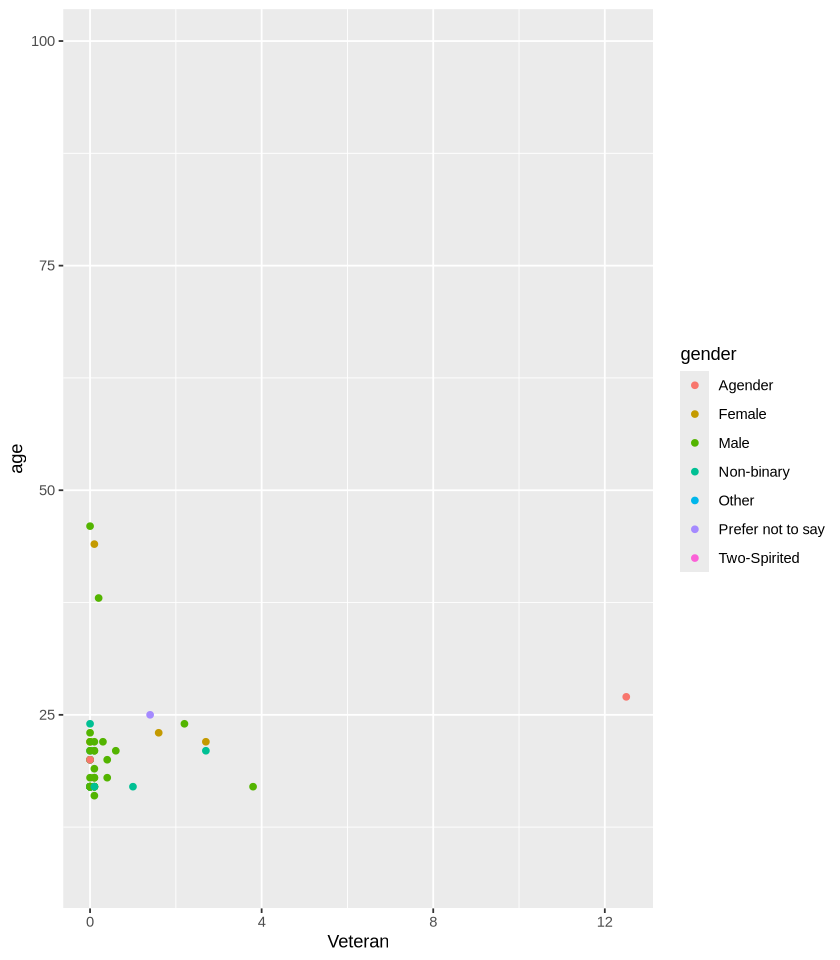

In [75]:
options(repr.plot.height = 8, repr.plot.width = 7)

player_point

In [76]:
lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

lm_spec

Linear Regression Model Specification (regression)

Computational engine: lm 


In [77]:
lm_recipe <- recipe(Veteran ~ age, data = player_training)

lm_fit <- workflow() |>
       add_recipe(lm_recipe) |>
       add_model(lm_spec) |>
       fit(data = player_training)

lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          age  
   -0.62129      0.06873  


Warning message:
“Removed 113 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 113 rows containing missing values or values outside the scale range
(`geom_line()`).”


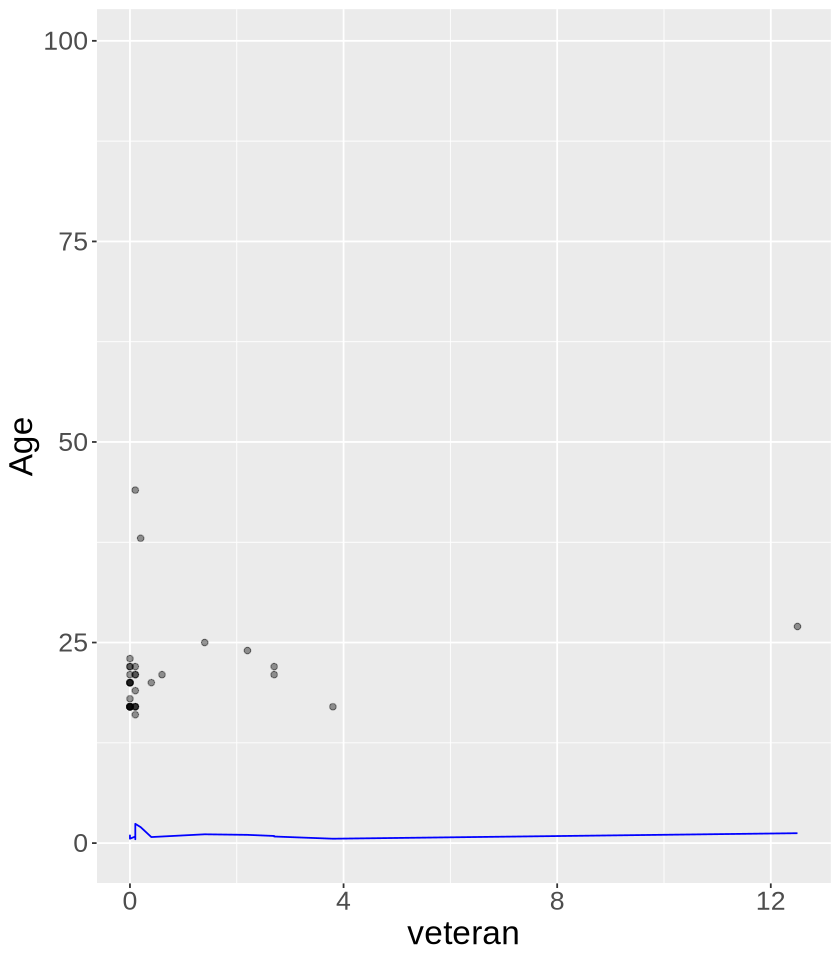

In [78]:
player_preds <- lm_fit |>
   predict(player_training) |>
   bind_cols(player_training)


 lm_predictions <- player_preds |>
     ggplot(aes(x = Veteran, y = age)) +
         geom_point(alpha = 0.4) +
         geom_line(
             mapping = aes(x = Veteran, y = .pred), 
             color = "blue") +
         xlab("veteran") +
         ylab("Age") +
         theme(text = element_text(size = 20))
lm_predictions

In [79]:
lm_test_results<- lm_fit |>
        predict(player_testing) |>
         bind_cols(player_testing) |>
         metrics(truth = age, estimate = .pred)

lm_rmspe <- lm_test_results |>
          filter(.metric == "rmse") |>
          select(.estimate) |>
pull()
          

lm_rmspe

[1] 24.22861

The upward answer used a simple linear regression method.

In [81]:
player_split <- initial_split(player_wide, prop = 0.75, strata = Veteran)
player_training <- training(player_split)
player_testing <- testing(player_split)

player_training
player_testing


player_spec<- nearest_neighbor(weight_func = "rectangular", neighbors = tune( )) |> 
       set_engine("kknn") |>
       set_mode("regression") 

player_recipe <- recipe(Veteran~age, data = player_split) |>
       step_scale(all_predictors()) |>
       step_center(all_predictors())
  
player_recipe


player_vfold <- vfold_cv(player_training, v = 5, strata = Veteran)

player_workflow <- workflow() |>
  add_recipe(player_recipe) |>
  add_model(player_spec)


player_workflow




subscribe,name,gender,age,Pro,Veteran,Amateur,Regular,Beginner
<lgl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TRUE,Morgan,Male,9,30.3,NA,NA,NA,NA
FALSE,Blake,Male,17,NA,0,NA,NA,NA
TRUE,Flora,Female,21,NA,NA,0.7,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
FALSE,Asher,Male,17,1.7,NA,NA,NA,NA
FALSE,Pascal,Male,22,NA,0.3,NA,NA,NA
TRUE,Ahmed,Other,91,0.2,NA,NA,NA,NA


subscribe,name,gender,age,Pro,Veteran,Amateur,Regular,Beginner
<lgl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TRUE,Adrian,Female,17,NA,NA,0,NA,NA
TRUE,Luna,Female,19,NA,NA,NA,0,NA
TRUE,Daniela,Male,17,0,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
TRUE,Charlie,Two-Spirited,17,NA,NA,0.4,NA,NA
FALSE,Sebastián,Male,24,NA,NA,2.1,NA,NA
TRUE,Hunter,Female,22,NA,NA,0.8,NA,NA




── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 1



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


The upward answer used a knn regression method.

Activity 4: Method and plan 
Why is this method appropriate? 
What are the potential limitations or weaknesses of the chosen approach? 
How do you plan to compare and choose models? 


I choose linear regression. Comparing the two methods, I found that linear regression was more precise than knn regression. Linear regression is well suited for initial modeling of relationships between exploratory variables where the data conforms to linear relationships. This is very suitable for the topic I have chosen. Moreover, the linear regression model is very simple and easy to understand, and the coefficient of each feature can intuitively show its influence on the target variable (positive or negative), which is very simple to explain.